# Contents

## 01 Set up 

## 02 Changing column names and data types

## 03 Histogram for orders at each hour of the day

## 04 Bar chart for loyalty flag

## 05 Line Charts

## 06 Scatter Plot

### 01 Set up

In [2]:
# Import Analysis Libraries
import pandas as pd
import numpy as np
import os

# Import Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Defining the main project path
proj = r'C:\Users\bfd_6\Documents\Career Foundry Project\Course Part 2\A4 Python\Instacart Basket Analysis'

In [4]:
# Creating a dataframe from the main dataset
ords_prods_all = pd.read_pickle(os.path.join(proj, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

### 02 Changing column names and data types

In [11]:
# Changing user_id to customer_id and changing the type of the new customer_id column to str. Customer_id is more accurate and 
# the data in this column is not quantitative, it is a unique identifier for each customer. 
ords_prods_all.rename(columns = {'user_id' : 'customer_id'}, inplace = True)

In [13]:
# Changing the data type.
ords_prods_all['customer_id'] = ords_prods_all['customer_id'].astype('str')

In [14]:
#Checking to make sure the changes worked. 
ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 30 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   customer_id             object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  price_range_loc         object  
 14  busiest_days            object  
 15  busiest_period_of_day   object  
 16  max_order               int64   
 17  loyalty_flag            object  
 18  cust_avg_price          float64 
 19  price_spender           object  
 20  cust_med_days           float64 
 21  cust_f

### I created a bar chart, histogram, scatterplot, and linechart (from a subset) while working through the exercise

### 03 Histogram for orders at each hour of the day

C:\Users\bfd_6\AppData\Local\Temp\ipykernel_36620\3228866008.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in cur_ytix])


Text(0, 0.5, 'Total Orders')

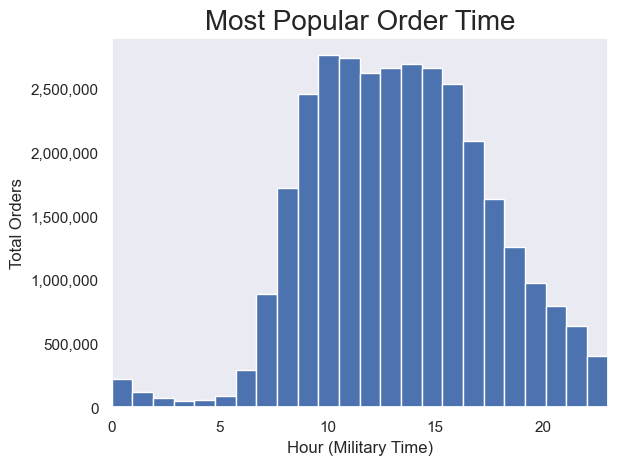

In [63]:
# Creating a histogram for order_hour_of_day
orders_by_hour_hist = ords_prods_all['order_hour_of_day'].plot.hist(bins = 24)
# Getting rid of scientific notation on y axis
plt.gca().ticklabel_format(axis = 'y', style = 'plain')
# Formatting y axis - 2 lines
cur_ytix = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in cur_ytix])
# This will clear extra space at the sides of the histogram.
plt.xlim(0, 23)
# Setting the titles.
orders_by_hour_hist.set_title("Most Popular Order Time", fontsize = 20)
orders_by_hour_hist.set_xlabel("Hour (Military Time)", fontsize = 12)
orders_by_hour_hist.set_ylabel("Total Orders", fontsize = 12)

#### This histogram shows the most popular times of day for customers to order from the app. The x-axis (bottom) shows military time (0 is midnight, 23 is 11 p.m.). The y-axis (left) shows the total number of orders. The most popular times to order are at the top tier of the "cake" - between 10 a.m. and 5 p.m.

In [64]:
# Saving the histogram
orders_by_hour_hist.figure.savefig(os.path.join(proj, '04 Analysis', 'Visualizations', 'orders_by_hour_histogram.png'), bbox_inches = 'tight')

### 04 Bar chart for loyalty flag

C:\Users\bfd_6\AppData\Local\Temp\ipykernel_36620\1772518174.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in cur_tix])


Text(0, 0.5, 'Total Orders')

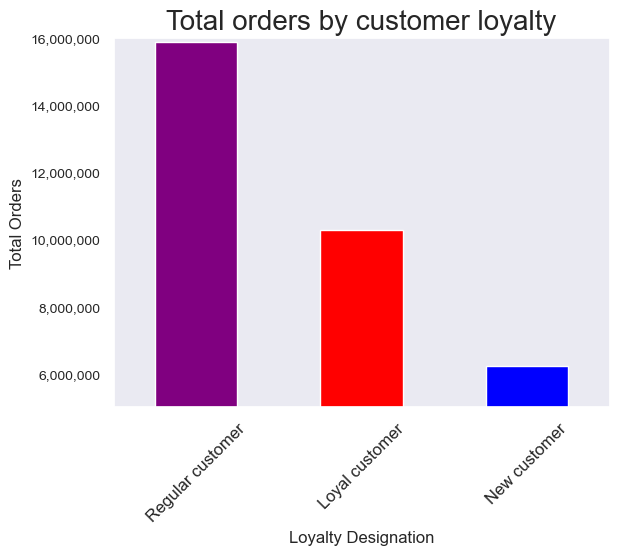

In [61]:
# Creating a bar chart based on the loyalty_flag column
pl_form = pl_ticker.ScalarFormatter()
loyalty_bar = ords_prods_all['loyalty_flag'].value_counts().plot.bar(color = ['purple', 'red', 'blue'])
# Formatting the x axis to angle the entries
plt.xticks(rotation = 45, fontsize = '12')
# Setting font size and range for the y axis - 2 lines.
plt.yticks(fontsize = '10')
plt.ylim(5000000, 16000000)
# Getting rid of scientific notation on y axis.
plt.gca().ticklabel_format(axis = 'y', style = 'plain')
# Formatting the numbers on the y axis - 2 lines.
cur_tix = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in cur_tix])
# Setting the titles.
loyalty_bar.set_title("Total orders by customer loyalty", fontsize = 20)
loyalty_bar.set_xlabel("Loyalty Designation", fontsize = 12)
loyalty_bar.set_ylabel("Total Orders", fontsize = 12)

In [62]:
# Saving the bar chart
loyalty_bar.figure.savefig(os.path.join(proj, '04 Analysis', 'Visualizations', 'loyalty_bar.png'), bbox_inches = 'tight')

### 05 Line Charts

#### Preparing a sample for line charts

In [4]:
# Creating the sample using seeded (reproducable) random numbers
np.random.seed(62)
kelce = np.random.rand(len(ords_prods_all)) <= 0.7

In [5]:
kelce

array([ True,  True, False, ...,  True,  True,  True])

In [6]:
# Storing 30% of the sample in a new df called sample_set
sample_set = ords_prods_all[~kelce]

In [7]:
# Checking sample set
sample_set.shape

(9728923, 30)

In [8]:
# Verifying that the sample is 30% of the main dataframe
len(sample_set) / len(ords_prods_all)

0.3002303759445458

In [9]:
sample_set.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,cust_med_days,cust_frequency,gender,state,age,date_joined,additional_family,marital_status,income,_merge
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
12,2398795,1,2,3,7,15.0,12427,3,1,Original Beef Jerky,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
13,473747,1,3,3,12,21.0,12427,2,1,Original Beef Jerky,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
14,2254736,1,4,4,7,29.0,12427,2,1,Original Beef Jerky,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


In [10]:
# Creating a subset of the sample to allow faster plotting
line_sample = sample_set[['order_hour_of_day', 'prices']]

In [11]:
line_sample.head()

,order_hour_of_day,prices
2,12,9.0
9,8,9.0
12,7,4.4
13,12,4.4
14,7,4.4


#### Line chart for item prices at each hour of the day

C:\Users\bfd_6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bfd_6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bfd_6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bfd_6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

(7.6, 8.0)

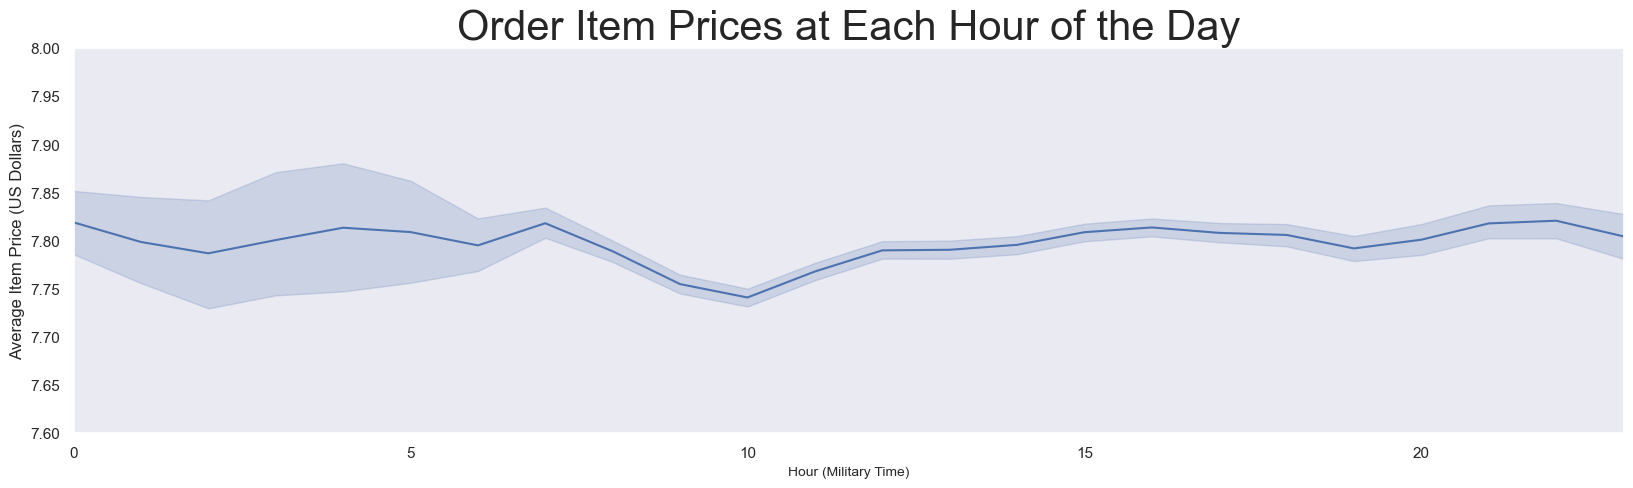

In [54]:
# Creating the line chart of the subset of the sample for prices vs. hour of day.
# Setting the base format for the chart - 2 lines.
fig = plt.subplots(figsize = (20, 5))
sns.set_theme(style = 'dark', font_scale = 1)
# Generating the line plot. 
price_hod_line = sns.lineplot(data = line_sample, x = 'order_hour_of_day', y = 'prices')
# Setting the titles.
price_hod_line.set_title("Order Item Prices at Each Hour of the Day", fontsize = 30)
price_hod_line.set_xlabel("Hour (Military Time)", fontsize = 10)
price_hod_line.set_ylabel("Average Item Price (US Dollars)", fontsize = 12)
# Setting the ranges for each axis.
plt.xlim(0, 23)
plt.ylim(7.6, 8)

In [55]:
# Saving the first line chart
price_hod_line.figure.savefig(os.path.join(proj, '04 Analysis', 'Visualizations', 'price_hod_line.png'))

#### Creating a subset for age and additional family to make the plot run faster

In [12]:
# Creating the subset of the sample for age vs. additional_family
age_fam = sample_set[['age', 'additional_family']]

In [13]:
age_fam.head()

,age,additional_family
2,31,3
9,31,3
12,31,3
13,31,3
14,31,3


#### Line chart for age vs. additional family.

C:\Users\bfd_6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bfd_6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bfd_6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bfd_6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

(1.0, 2.0)

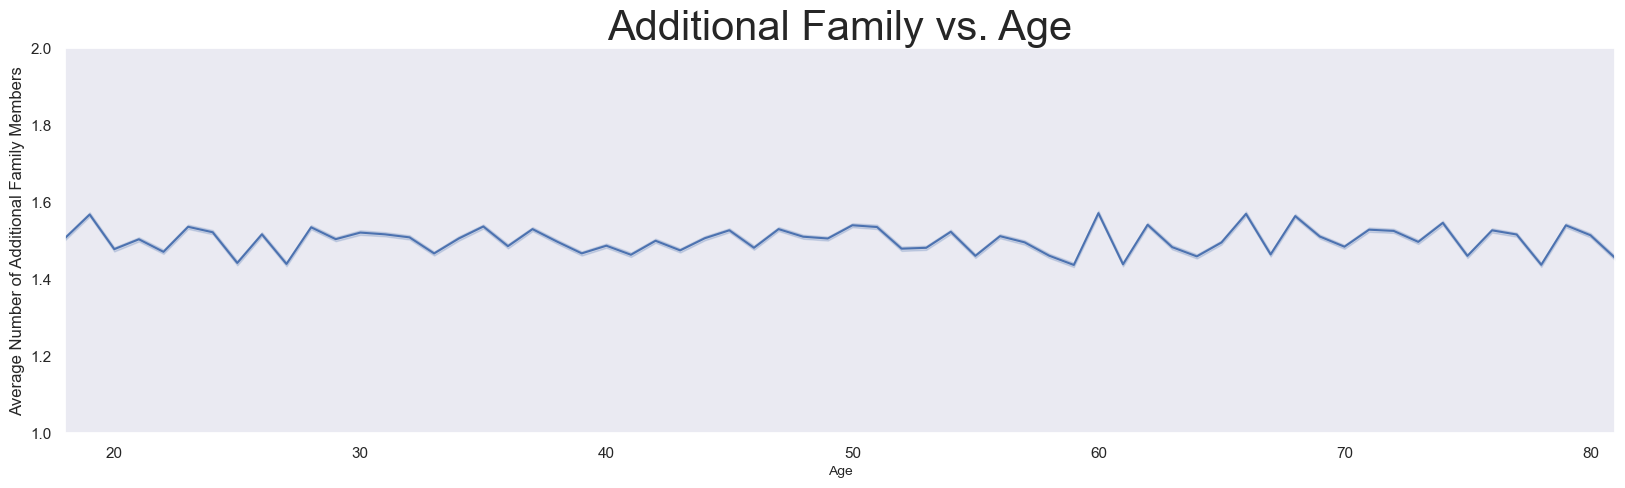

In [25]:
# Creating the line chart of the subset of the sample for age vs. additional_family.
# Base formatting for the chart
fig = plt.subplots(figsize = (20, 5))
sns.set_theme(style = 'dark', font_scale = 1)
# Generating the line plot.
age_fam_line = sns.lineplot(data = age_fam, x = 'age', y = 'additional_family')
# Setting the titles.
age_fam_line.set_title("Additional Family vs. Age", fontsize = 30)
age_fam_line.set_xlabel("Age", fontsize = 10)
age_fam_line.set_ylabel("Average Number of Additional Family Members", fontsize = 12)
# Setting the range for each axis.
plt.xlim(18, 81)
plt.ylim(1, 2)

In [26]:
# Saving second line chart
age_fam_line.figure.savefig(os.path.join(proj, '04 Analysis', 'Visualizations', 'age_fam_line.png'))

#### This graph shows that the average family size does not vary greatly based on age.

### 06 Scatter Plot

C:\Users\bfd_6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bfd_6\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bfd_6\AppData\Local\Temp\ipykernel_10664\2799488575.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in cur_xtix])


(15.0, 85.0)

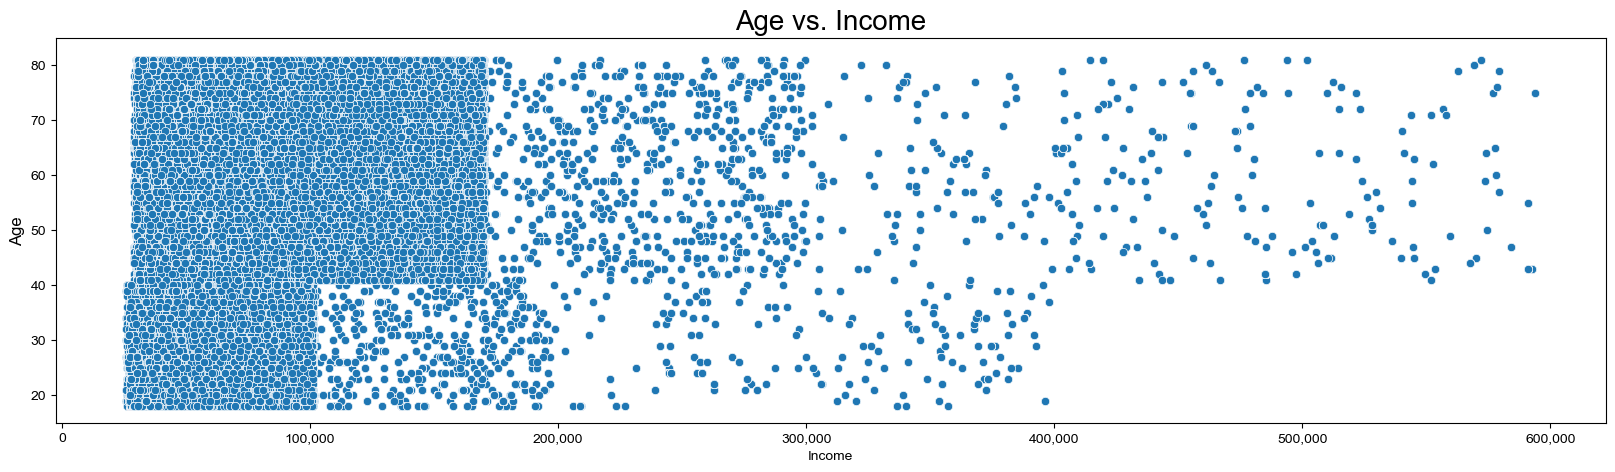

In [5]:
# Creating the scatter plot for age vs. income
# Base formatting for the chart
fig = plt.subplots(figsize = (20, 5))
sns.set_theme(style = 'dark', font_scale = 1)
# Generating the line plot.
age_income_scatter = sns.scatterplot(x = 'income', y = 'age', data = ords_prods_all)
# Formatting the numbers on the x axis - 2 lines.
cur_xtix = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in cur_xtix])
# Setting the titles.
age_income_scatter.set_title("Age vs. Income", fontsize = 20)
age_income_scatter.set_xlabel("Income", fontsize = 10)
age_income_scatter.set_ylabel("Age", fontsize = 12)
# Setting the range for the y axis
plt.ylim(15, 85)

In [71]:
# Saving second line chart
age_income_scatter.figure.savefig(os.path.join(proj, '04 Analysis', 'Visualizations', 'age_income_scatter.png'))

#### This scatter plot shows a very high density between 24,000usd and 100,000usd across all ages; however, as income rises there are fewer data points at all ages, but no data points under age 40 for income levels over 400,000. It appears that customers over 40 years of age tend to have more income than customers 40 and under. 